# Dataset Analysis

In [1]:
%matplotlib inline

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

import utils

# This sets the style of Seaborn plots to make them more readable in a Jupyter Notebook.
sns.set_context("notebook", font_scale=1.5)
# This sets the default figure size for all Matplotlib plots
plt.rcParams['figure.figsize'] = (17, 5)

In [14]:
import numpy as np
import pandas as pd
import utils  # Ensure you have a `utils` module with the `load` function

# Load FMA dataset files (metadata, genres, features, and Echonest features)
tracks = utils.load('data/fma_metadata/tracks.csv')       # Track metadata
genres = utils.load('data/fma_metadata/genres.csv')       # Genre information
features = utils.load('data/fma_metadata/features.csv')   # Extracted audio features
echonest = utils.load('data/fma_metadata/echonest.csv')   # Echonest-provided audio features

# Ensure consistency across datasets
# Verify that 'features' and 'tracks' have the same index (track IDs should match)
np.testing.assert_array_equal(features.index, tracks.index)

# Check if all Echonest indices exist in the tracks dataset
assert echonest.index.isin(tracks.index).all(), "Some Echonest data points are missing in tracks."

# Display dataset shapes (useful for debugging and understanding dataset size)
print(f"Tracks: {tracks.shape}, Genres: {genres.shape}, Features: {features.shape}, Echonest: {echonest.shape}")


Tracks: (106574, 52), Genres: (163, 4), Features: (106574, 518), Echonest: (13129, 249)


#  1.Dataset Size

In [3]:
df_sizes = pd.DataFrame({
    "Dataset": ["Tracks", "Genres", "Features", "Echonest"],
    "Rows": [len(tracks), len(genres), len(features), len(echonest)],
    "Columns": [tracks.shape[1], genres.shape[1], features.shape[1], echonest.shape[1]]
})
display(df_sizes)


,Dataset,Rows,Columns
0,Tracks,106574,52
1,Genres,163,4
2,Features,106574,518
3,Echonest,13129,249


# 2.Dataset DataFrames Details

These four dataframes contain different aspects of the Free Music Archive (FMA) dataset, each serving a specific purpose.

---

##  1. Tracks Dataset
- **Entries:** 106,574 tracks  
- **Columns:** 52  
- **Description:**  
  - Contains metadata about music tracks, including **album, artist, track details, and genre labels**.
  - Includes timestamps like **date created, date released**, and user interactions like **favorites and listens**.
  - **Track-specific features** include **bit rate, duration, language code, and license type**.
- **Use Case in ML:**  
  - **Genre classification** (using `track, genre_top`)   
  - **Trend analysis** (release dates, artist popularity)  

---

##  2. Genres Dataset
- **Entries:** 163 genres  
- **Columns:** 4  
- **Description:**  
  - Defines the **hierarchy of music genres**, including **parent-child relationships**.
  - Tracks count per genre (`#tracks`) helps analyze genre distribution.
- **Use Case in ML:**  
  - **Genre classification** (mapping genres to tracks)  
  - **Genre hierarchy exploration** (for hierarchical classification)  

---

##  3. Features Dataset
- **Entries:** 106,574 tracks  
- **Columns:** 518  
- **Description:**  
  - Contains **extracted audio features** for each track.
  - Features include **chroma, MFCC, spectral properties, zero-crossing rate, etc.**.
  - Each feature has **statistical summaries** (mean, standard deviation, kurtosis, etc.).
- **Use Case in ML:**  
  - **Genre classification** (using audio patterns)  
  - **Feature selection & correlation analysis**  
  - **Music similarity analysis**  

---

##  4. Echonest Dataset
- **Entries:** 13,129 tracks  
- **Columns:** 249  
- **Description:**  
  - Extracted **audio & temporal features** from **Echonest API**.
  - Includes **acousticness, danceability, energy, tempo, and valence**.
  - Some metadata like album release date is also present.
- **Use Case in ML:**  
  - **Music recommendation systems**  
  - **Genre classification** (combining with Features dataset)  
  - **Mood-based music tagging**  

---

## Our Goal
- Use **Tracks & Genres** for **metadata-driven analysis**.
- Use **Features & Echonest** for **audio-driven classification & recommendations**.
- Prepare these datasets for training **Logistic Regression, kNN, SVM, and MLP models**.
"""

In [4]:
for name, df in zip(["Tracks", "Genres", "Features", "Echonest"], 
                     [tracks, genres, features, echonest]):
    print(f"📊 {name} Dataset:")
    display(df.info())  # Shows data types & missing values
    display(df.head())  # Shows first 5 rows
    print("\n" + "="*80 + "\n")  # Separator


📊 Tracks Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 106574 entries, 2 to 155320
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   (album, comments)            106574 non-null  int64         
 1   (album, date_created)        103045 non-null  datetime64[ns]
 2   (album, date_released)       70294 non-null   datetime64[ns]
 3   (album, engineer)            15295 non-null   object        
 4   (album, favorites)           106574 non-null  int64         
 5   (album, id)                  106574 non-null  int64         
 6   (album, information)         83149 non-null   category      
 7   (album, listens)             106574 non-null  int64         
 8   (album, producer)            18060 non-null   object        
 9   (album, tags)                106574 non-null  object        
 10  (album, title)               105549 non-null  object        
 11  (album, track

None

album                                                          \
         comments        date_created date_released engineer favorites id   
track_id                                                                    
2               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
3               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
5               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
10              0 2008-11-26 01:45:08    2008-02-06      NaN         4  6   
20              0 2008-11-26 01:45:05    2009-01-06      NaN         2  4   

                                                                           \
                                        information listens producer tags   
track_id                                                                    
2                                           <p></p>    6073      NaN   []   
3                                           <p></p>    6073      NaN   []   
5                                           <p></p>    6073      NaN   []   
10                                              NaN   47632      NaN   []   
20        <p> "spiritual songs" from Nicky Cook</p>    2710      NaN   []   

          ...       track                         \
          ... information interest language_code   
track_id  ...                                      
2         ...         NaN     4656            en   
3         ...         NaN     1470            en   
5         ...         NaN     1933            en   
10        ...         NaN    54881            en   
20        ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]



📊 Genres Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 1 to 1235
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   #tracks    163 non-null    int64 
 1   parent     163 non-null    int64 
 2   title      163 non-null    object
 3   top_level  163 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


None

,#tracks,parent,title,top_level
genre_id,,,,
1,8693,38,Avant-Garde,38
2,5271,0,International,2
3,1752,0,Blues,3
4,4126,0,Jazz,4
5,4106,0,Classical,5




📊 Features Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 106574 entries, 2 to 155320
Columns: 518 entries, ('chroma_cens', 'kurtosis', '01') to ('zcr', 'std', '01')
dtypes: float64(518)
memory usage: 422.0 MB


None

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.095003  0.022492   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  

[5 rows x 518 columns]



📊 Echonest Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 13129 entries, 2 to 124911
Columns: 249 entries, ('echonest', 'audio_features', 'acousticness') to ('echonest', 'temporal_features', '223')
dtypes: float64(244), object(5)
memory usage: 25.0+ MB


None

echonest                                                    \
         audio_features                                                     
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   

                                                                        ...  \
                                           metadata                     ...   
         speechiness    tempo   valence  album_date         album_name  ...   
track_id                                                                ...   
2           0.159310  165.922  0.576661         NaN                NaN  ...   
3           0.461818  126.957  0.269240         NaN                NaN  ...   
5           0.124595  100.260  0.621661         NaN                NaN  ...   
10          0.032985  111.562  0.963590  2008-03-11  Constant Hitmaker  ...   
134         0.525519  114.290  0.894072         NaN                NaN  ...   

                                                                              \
         temporal_features                                                     
                       214        215       216       217       218      219   
track_id                                                                       
2                -1.992303   6.805694  0.233070  0.192880  0.027455  0.06408   
3                -1.582331   8.889308  0.258464  0.220905  0.081368  0.06413   
5                -2.288358  11.527109  0.256821  0.237820  0.060122  0.06014   
10               -3.662988  21.508228  0.283352  0.267070  0.125704  0.08082   
134              -1.452696   2.356398  0.234686  0.199550  0.149332  0.06440   

                                                     
                                                     
               220       221        222         223  
track_id                                             
2          3.67696   3.61288  13.316690  262.929749  
3          6.08277   6.01864  16.673548  325.581085  
5          5.92649   5.86635  16.013849  356.755737  
10         8.41401   8.33319  21.317064  483.403809  
134       11.26707  11.20267  26.454180  751.147705  

[5 rows x 249 columns]

#  3. Visualize Missing Data (Heatmap)

##  Missing Data Analysis for Tracks Dataset

The missing data visualization above highlights **missing values** (yellow) across different columns in the **Tracks dataset**. Some key observations:

- **Album-related features** like `date_released`, `engineer`, and `producer` have a significant amount of missing data.
- **Artist-related attributes**, including `active_year_end`, `associated_labels`, and `wikipedia_page`, have high missing values.
- **Track-related features**, such as `composer`, `date_recorded`, and `lyricist`, also contain gaps.

###  **Why This Matters for Model Training**
Understanding missing data is **critical** before training a machine learning model because:
1. **Feature Selection:** Columns with excessive missing values may be **removed** to avoid unreliable predictions.
2. **Data Imputation:** Missing values can be **filled** using statistical methods (mean, median) or predictive techniques.
3. **Bias Reduction:** Ensuring complete data prevents **skewed learning**, leading to better model generalization.
4. **Performance Improvement:** Cleaning the dataset helps avoid **data leakage** and ensures the model learns from **accurate** information.

###  **Next Steps**
- Drop or impute features with excessive missing values.
- Consider **removing non-informative** columns that might not contribute to genre classification.
- Ensure that selected features are well-represented across all samples before training the ML models.




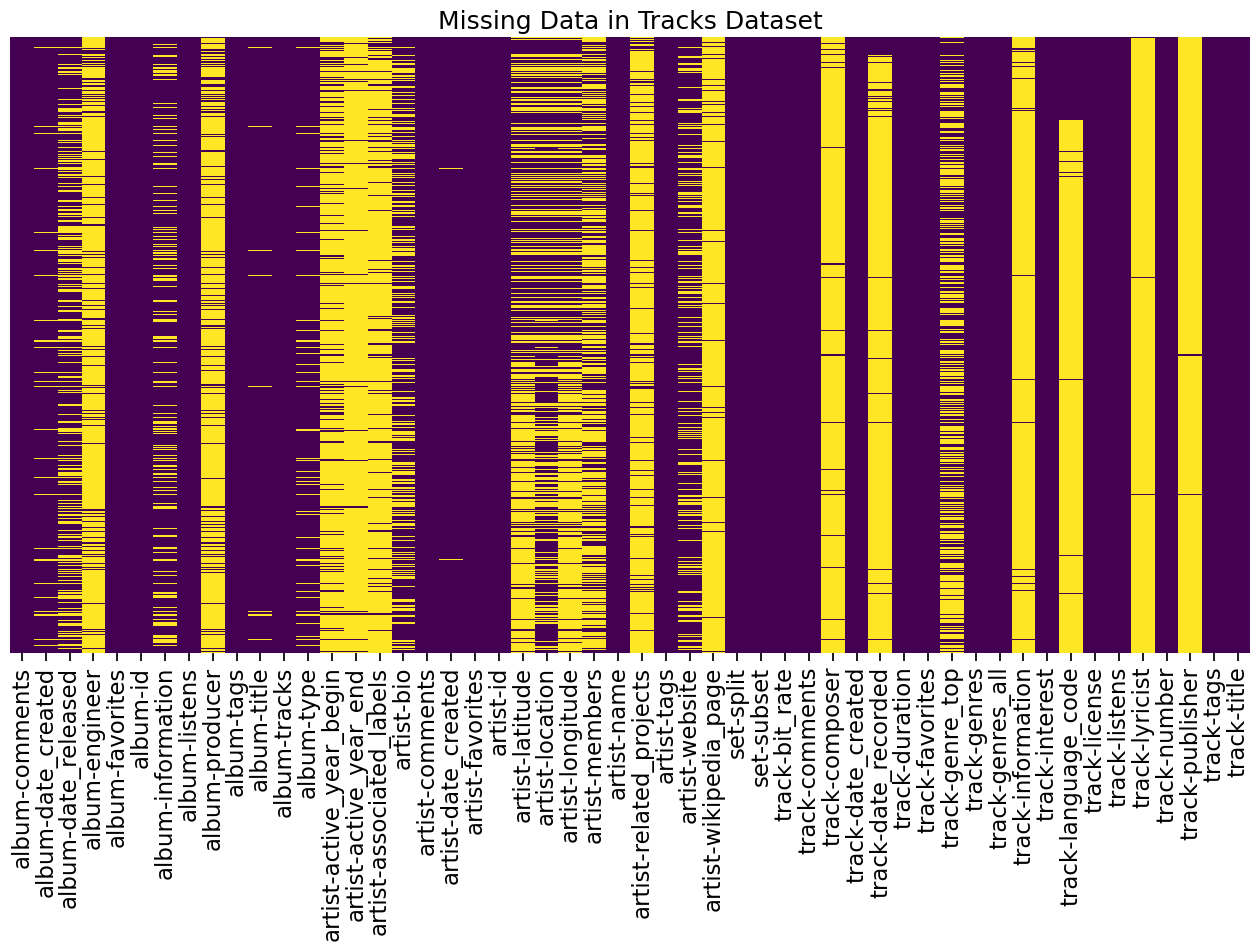

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
sns.heatmap(tracks.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.xlabel("")  # Remove unwanted x-axis label
plt.ylabel("")  # Remove unwanted y-axis label
plt.title("Missing Data in Tracks Dataset")
plt.show()


### 🎵 Top 25 Genres in FMA Dataset

This bar chart represents the **top 25 most frequent genres** in the Free Music Archive (FMA) dataset. The **y-axis** shows the number of tracks associated with each genre, while the **x-axis** lists the genres. 

#### 🔍 **Key Observations:**
- The most dominant genres in the dataset are **Experimental, Electronic, and Rock**, each having over 30,000 tracks.
- Genres like **Pop, Folk, and Punk** also have significant representation.
- The least frequent genres in the top 25 include **Field Recordings, IDM, Garage, and Jazz** with track counts below 5,000.

####  **How This Helps in Training the Model**
- **Class Imbalance Consideration:**  
  - Since some genres have significantly more tracks than others, the model might **favor** well-represented genres.
  - Consider **balancing the dataset** using techniques like **undersampling, oversampling, or weighting loss functions**.
  
- **Feature Engineering & Genre Classification:**  
  - This distribution provides insight into how well the dataset can be used for **multi-class genre classification**.
  - If certain genres have too few samples, they may not provide **enough training data** for robust classification.

####  **Possible Next Steps:**
- **Balance the dataset** by reducing overrepresented genres or increasing samples for underrepresented genres.
- **Feature selection** to ensure we use **relevant** characteristics from the audio data for classification.


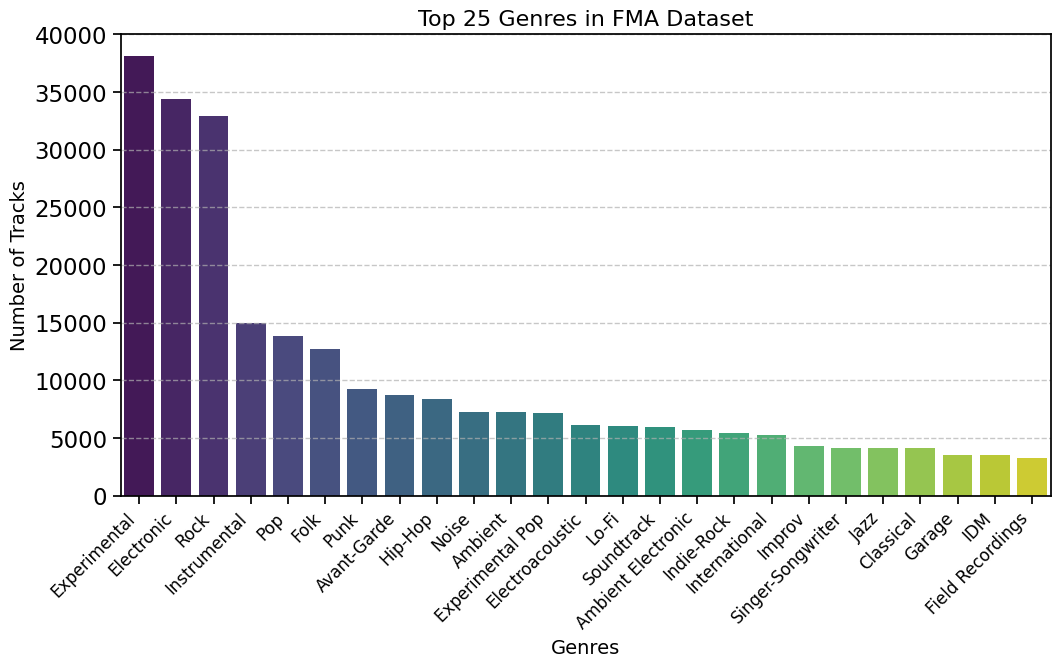

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by number of tracks
top_n = 25  # Adjust this number as needed
genres_sorted = genres.sort_values(by="#tracks", ascending=False).head(top_n)

# Improved visualization
plt.figure(figsize=(12, 6))
sns.barplot(x="title", y="#tracks", hue="title", data=genres_sorted, legend=False, palette="viridis")

# Formatting
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate labels for clarity
plt.xlabel("Genres", fontsize=14)
plt.ylabel("Number of Tracks", fontsize=14)
plt.title(f"Top {top_n} Genres in FMA Dataset", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


#  Track Duration Distribution Analysis

The histogram above shows the **distribution of track durations** in the FMA dataset. A few key observations:

- The majority of tracks have **short durations** (less than ~500 seconds or ~8 minutes).
- There is a **long tail** of tracks with much **longer durations**, but these are rare.
- The **Kernel Density Estimate (KDE) line** confirms that most tracks are concentrated in the lower range.
- Some extreme **outliers** exist beyond 10,000 seconds (~2.7 hours), which might be errors or unusually long recordings.

### 🔍 **How This Helps in Training the Model**
- **Feature Engineering**: Track duration can be used as a feature for **genre classification** since some genres may favor shorter or longer tracks.
- **Data Cleaning**: Outliers in the duration may need to be **removed or transformed** to avoid skewing the model.
- **Normalization**: Since duration values have a **wide range**, applying **log transformation** or **standardization** can improve model performance.

---


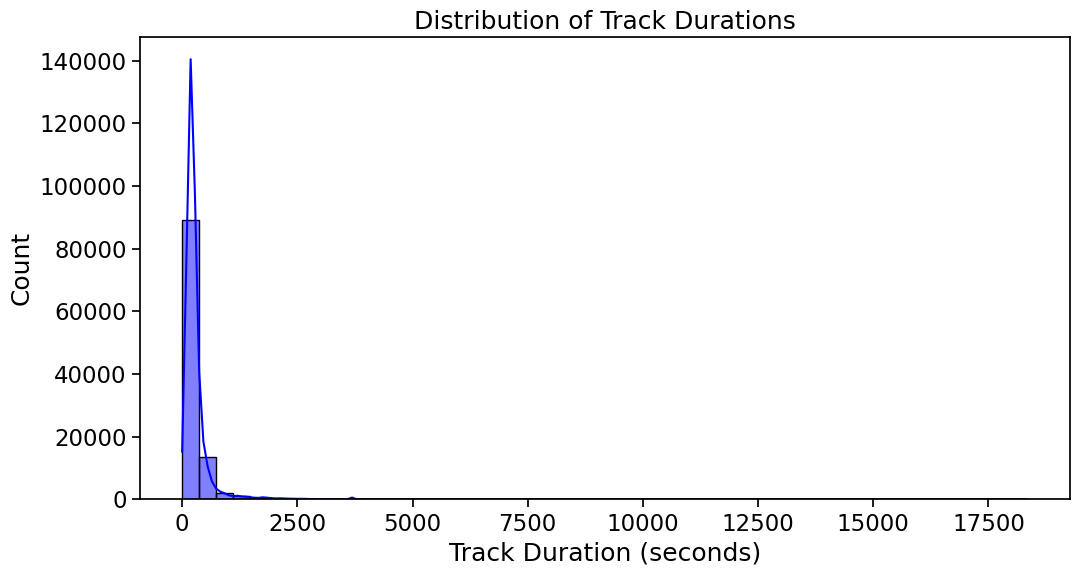

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(tracks['track', 'duration'].dropna(), bins=50, kde=True, color='blue')
plt.xlabel("Track Duration (seconds)")
plt.ylabel("Count")
plt.title("Distribution of Track Durations")
plt.show()


# FMA Dataset Overview

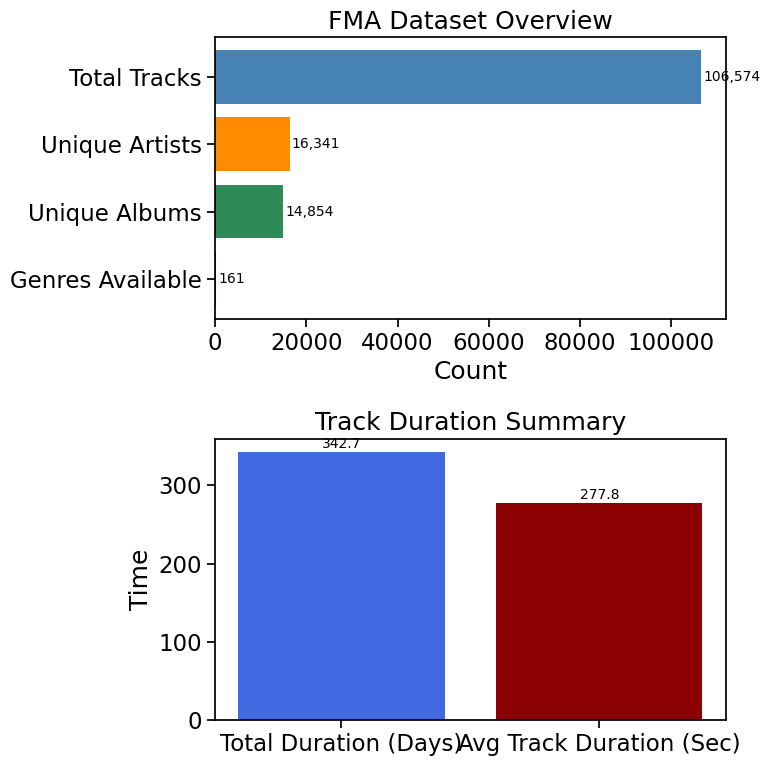

small    8000 tracks  2.8 days
medium  25000 tracks  8.7 days
large  106574 tracks  37.0 days


In [8]:
import matplotlib.pyplot as plt

# Summarizing FMA Dataset
total_tracks = len(tracks)
total_artists = len(tracks['artist', 'id'].unique())
total_albums = len(tracks['album', 'id'].unique())
total_genres = sum(genres['#tracks'] > 0)

# Track Duration Summary
mean_duration = tracks['track', 'duration'].mean()
total_duration_days = sum(tracks['track', 'duration']) / 3600 / 24

# Data for Visualization
summary_labels = ["Total Tracks", "Unique Artists", "Unique Albums", "Genres Available"]
summary_values = [total_tracks, total_artists, total_albums, total_genres]

# Adjust Figure Size for Better Proportion
fig, axes = plt.subplots(2, 1, figsize=(8, 8))  

# First Chart: Dataset Overview
axes[0].barh(summary_labels, summary_values, color=["steelblue", "darkorange", "seagreen", "firebrick"])
axes[0].set_xlabel("Count")
axes[0].set_title("FMA Dataset Overview")

# Add precise values next to bars
for index, value in enumerate(summary_values):
    axes[0].text(value + 500, index, f"{value:,}", va="center", fontsize=10)

axes[0].invert_yaxis()  # Invert Y-axis for better readability

# Second Chart: Track Duration Summary
duration_labels = ["Total Duration (Days)", "Avg Track Duration (Sec)"]
duration_values = [total_duration_days, mean_duration]

axes[1].bar(duration_labels, duration_values, color=["royalblue", "darkred"])
axes[1].set_title("Track Duration Summary")
axes[1].set_ylabel("Time")

# Add precise values above bars
for index, value in enumerate(duration_values):
    axes[1].text(index, value + 5, f"{value:.1f}", ha="center", fontsize=10)

plt.tight_layout()
plt.show()

print("="*100)

for subset in tracks['set', 'subset'].unique():
    indicator = tracks['set', 'subset'] <= subset
    print('{:6} {:6} tracks  {:.1f} days'.format(
        subset, sum(indicator), sum(indicator) * 30 / 3600 / 24))


## 🔍 Understanding Dimensionality Calculation

### **Formula Used:**
$$
\text{dimensionality} = \text{mean\_duration} \times 44,000 \times 2
$$



### **Breaking it Down:**
- **`mean_duration`** → Average track length in seconds.
- **$44,000$** → Standard **audio sampling rate** (44.1 kHz), meaning **44,100 samples per second**.
- **$2$** → Each track is **stereo**, meaning it has **two channels**.

### **Why Does This Matter?**
- This tells us the **raw size of an audio track** before feature extraction.
- **Raw audio data is massive**, requiring significant computational resources.
- Instead of using **raw waveforms**, we extract **features** to make ML models efficient.

### **Dataset-Wide Calculation:**
$$
\text{Total Samples} = \text{dimensionality} \times \text{Total Tracks}
$$
This gives the total number of **audio samples** across the dataset.

### **Example Computation**
If:
- **Mean Track Duration** = **278 sec**
- **Total Tracks** = **106,574**
- **Sampling Rate** = **44,000 Hz**
- **Channels** = **2**

Then:
$$
\text{dimensionality} = 278 \times 44,000 \times 2 = 2.44 \times 10^7
$$
$$
\text{total samples} = 2.44 \times 10^7 \times 106,574 = 2.6 \times 10^{12}
$$

### **Key Takeaway**
- **Storing raw audio is extremely costly**.
- **Feature extraction** significantly reduces data size.
- **Machine learning models** use extracted **spectral and temporal features** instead of raw samples.


In [9]:
# Compute Dataset Statistics
mean_duration = tracks['track', 'duration'].mean()  # Average track duration in seconds
total_tracks = len(tracks)  # Total number of tracks

# Audio Sampling Parameters
sampling_rate = 44000  # 44.1 kHz audio sampling rate
channels = 2  # Stereo audio (2 channels)

# Compute dimensionality for a single track
dimensionality = mean_duration * sampling_rate * channels

# Compute total dataset size in terms of audio samples
total_audio_samples = dimensionality * total_tracks

# Display results
print("="*60)
print(" FMA Audio Dataset - Dimensionality Estimation")
print("="*60)
print(f" Average Track Duration: {mean_duration:.2f} seconds")
print(f" Total Tracks: {total_tracks:,}")
print(f" Sampling Rate: {sampling_rate:,} samples/second")
print(f" Audio Channels: {channels} (Stereo)")
print("-"*60)
print(f" Sample Dimensionality per Track: {dimensionality:.1e} samples")
print(f" Total Dataset Size (Audio Samples): {total_audio_samples:.1e}")
print("="*60)

 FMA Audio Dataset - Dimensionality Estimation
 Average Track Duration: 277.85 seconds
 Total Tracks: 106,574
 Sampling Rate: 44,000 samples/second
 Audio Channels: 2 (Stereo)
------------------------------------------------------------
 Sample Dimensionality per Track: 2.4e+07 samples
 Total Dataset Size (Audio Samples): 2.6e+12


### Growth of Tracks Over Time

#### Overview
This plot visualizes the **number of tracks added every two months** over time.  
It helps identify dataset expansion trends and track availability.

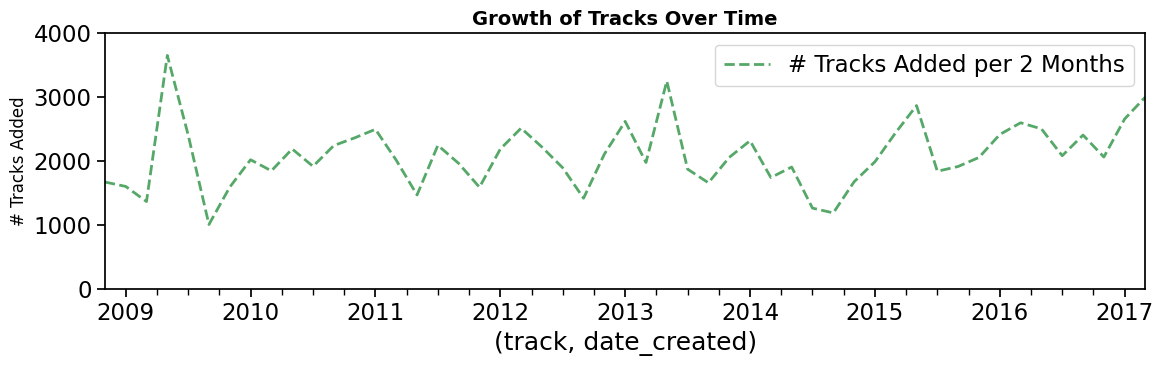

In [10]:
# Ensure track data has valid datetime index
d = pd.DataFrame(index=pd.to_datetime(tracks['track', 'date_created']))
d['indicator'] = 1  # Used for counting tracks over time

# 🎨 Initialize figure
fig, ax = plt.subplots(figsize=(12, 4))

# 🟢 Resample and plot "# Tracks Added per 2 Months"
color = sns.color_palette('deep', 3)[2]
resampled = d['indicator'].resample('2ME').sum().fillna(0)
resampled.plot(ax=ax, linestyle='--', linewidth=2, color=color, label="# Tracks Added per 2 Months")

# 📊 Axis Labels and Limits
ax.set_ylabel("# Tracks Added", fontsize=12)
ax.set_ylim(0, 4000)

# 📊 Title and Formatting
plt.title("Growth of Tracks Over Time", fontsize=14, fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show()

## 📊 FMA Dataset Splits Summary

| **Subset** | **#Train** | **#Val** | **#Test** | **Val_Ratio** | **Test_Ratio** |
|-----------|----------|---------|---------|------------|------------|
| small    | 6400     | 800     | 800     | 0.12       | 0.12       |
| medium   | 19922    | 2595    | 2573    | 0.13       | 0.13       |
| large    | 84353    | 10958   | 11263   | 0.13       | 0.13       |

###  Notes:
- **#Train** → Number of training samples.
- **#Val** → Number of validation samples.
- **#Test** → Number of test samples.
- **Val_Ratio** → Validation set proportion relative to training.
- **Test_Ratio** → Test set proportion relative to training.

###  Industry Norms:
- A typical **train-validation-test split** is **80-10-10** or **70-15-15**.
- Here, the **validation and test ratios** are approximately **12-13%**, aligning with standard ML practices.


In [11]:
SPLITS = ['training', 'validation', 'test']
SUBSETS = ['small', 'medium', 'large']
print('subset    #train    #val   #test  val_ratio test_ratio')
for subset in SUBSETS:
    counts = np.array([sum((tracks['set', 'split'] == split) & (tracks['set', 'subset'] <= subset)) for split in SPLITS])
    ratios = counts[1:] / counts[0]  # Compute validation and test ratios w.r.t training
    print('{:8s} {:7d} {:7d} {:7d} {:8.2f} {:9.2f}'.format(subset, *counts, *ratios))

subset    #train    #val   #test  val_ratio test_ratio
small       6400     800     800     0.12      0.12
medium     19922    2505    2573     0.13      0.13
large      84353   10958   11263     0.13      0.13


##  Genre-Wise Dataset Distribution

This table provides an overview of the dataset distribution across different **music genres**, showing how tracks are split into **training, validation, and test sets**.

###  Key Information:
- **Genres**: Listed in descending order based on the number of training samples.
- **#Tracks**: Total number of tracks available for each genre.
- **#Training, #Validation, #Test**: Number of tracks assigned to each dataset split.
- **Val_Ratio & Test_Ratio**: Proportion of validation and test sets relative to training.

###  Observations:
- **Rock, Electronic, and Experimental genres** have the highest number of tracks.
- Some genres have **fewer total samples**, leading to **lower validation and test ratios**.
- The dataset follows a **roughly 8:1:1 split** (training:validation:test), ensuring a balanced distribution.

This helps in **understanding the dataset balance** before model training.


In [12]:
for subset in ['small', 'medium']:
    subset = tracks['set', 'subset'] <= subset

    d = genres.reset_index().set_index('title')
    d = d.loc[tracks.loc[subset, ('track', 'genre_top')].unique()]

    for split in SPLITS:
        b = tracks['set', 'split'] == split
        d['#' + split] = tracks.loc[subset & b, ('track', 'genre_top')].value_counts()

    d['val_ratio'] = d['#training'] / d['#validation']
    d['test_ratio'] = d['#training'] / d['#test']

    ipd.display(d.sort_values('#training', ascending=False))

,genre_id,#tracks,parent,top_level,#training,#validation,#test,val_ratio,test_ratio
title,,,,,,,,,
Hip-Hop,21,8389,0,21,800,100,100,8.0,8.0
Pop,10,13845,0,10,800,100,100,8.0,8.0
Folk,17,12706,0,17,800,100,100,8.0,8.0
Experimental,38,38154,0,38,800,100,100,8.0,8.0
Rock,12,32923,0,12,800,100,100,8.0,8.0
International,2,5271,0,2,800,100,100,8.0,8.0
Electronic,15,34413,0,15,800,100,100,8.0,8.0
Instrumental,1235,14938,0,1235,800,100,100,8.0,8.0


,genre_id,#tracks,parent,top_level,#training,#validation,#test,val_ratio,test_ratio
title,,,,,,,,,
Rock,12,32923,0,12,5681,711,711,7.990155,7.990155
Electronic,15,34413,0,15,5050,632,632,7.990506,7.990506
Experimental,38,38154,0,38,1801,225,225,8.004444,8.004444
Hip-Hop,21,8389,0,21,1761,220,220,8.004545,8.004545
Folk,17,12706,0,17,1215,152,152,7.993421,7.993421
Instrumental,1235,14938,0,1235,1045,131,174,7.977099,6.005747
Pop,10,13845,0,10,945,122,119,7.745902,7.941176
International,2,5271,0,2,814,102,102,7.980392,7.980392
Classical,5,4106,0,5,495,62,62,7.983871,7.983871


## 📊 Distribution of Track Bit Rates

### Overview:
- This plot illustrates the distribution of bit rates in the dataset.
- The x-axis represents the **bit rate (kbps)**, while the y-axis shows the **number of tracks** at each bit rate.

### Key Observations:
- A **few standard bit rates** dominate the dataset, with **common peaks** around **128k, 192k, 256k, and 320k kbps**.
- A **significant majority** of tracks are encoded at **320 kbps**, suggesting a preference for high-quality audio.
- Some tracks have **unusually low or high bit rates**, possibly due to **variable bit rate (VBR) encoding**.

###  Importance for Model Training:
- **Feature Consistency**: Bit rate influences the **quality and structure of extracted audio features**. Standardized bit rates lead to **more consistent input data** for the model.
- **Data Cleaning**: Identifying uncommon bit rates allows us to **filter out low-quality or inconsistent audio**, reducing noise in training.
- **Compression Artifacts**: Lower bit rates introduce **compression artifacts**, which might affect feature extraction and genre classification.
- **Variable Bit Rate (VBR) Handling**: The presence of **VBR tracks** suggests that preprocessing may be required to ensure uniform data representation.

###  Industry Insights:
- Standard bit rates for MP3 compression typically include **128 kbps, 192 kbps, 256 kbps, and 320 kbps**.
- Lower bit rates generally **sacrifice audio quality** to save storage, while **higher bit rates provide better fidelity**.
- The presence of **outliers** might indicate **corrupted data or non-standard encoding formats**, which should be handled before training.


Common bit rates: [320000, 256000, 192000, 128000, 160000]
Average bit rate: 263 kbit/s


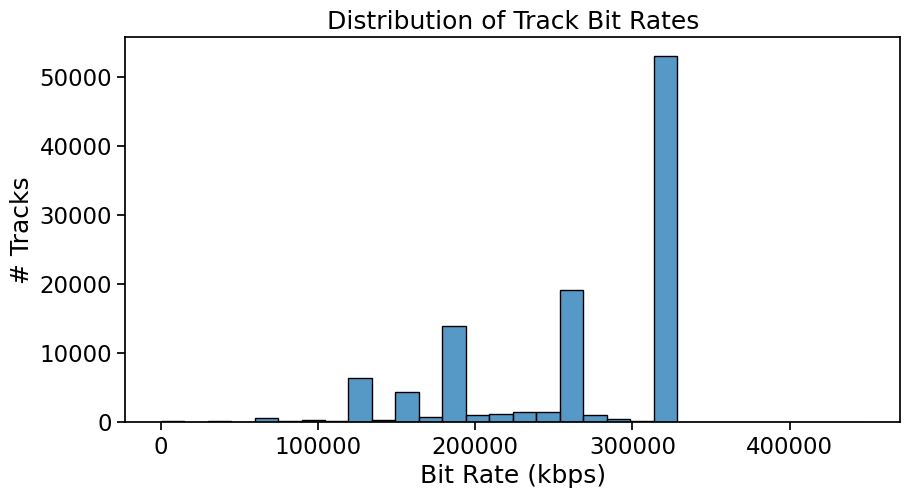

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Display common bit rates
print('Common bit rates: {}'.format(tracks['track', 'bit_rate'].value_counts().head(5).index.tolist()))
print('Average bit rate: {:.0f} kbit/s'.format(tracks['track', 'bit_rate'].mean()/1000))

# 📈 Use histplot instead of the deprecated distplot
plt.figure(figsize=(10, 5))
p = sns.histplot(tracks['track', 'bit_rate'], bins=30, kde=False)  # Updated function
p.set_xlabel('Bit Rate (kbps)')
p.set_ylabel('# Tracks')
p.set_title("Distribution of Track Bit Rates")
plt.show()
